In [74]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import pingouin as pg

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [36]:
ab_users_data = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/ab_users_data.csv")
ab_products = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/ab_products.csv")
ab_orders = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/ab_orders.csv")

In [37]:
ab_users_data

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03.000000,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05.000000,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27.000000,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06.000000,2022-09-08,0


In [38]:
ab_products

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0
...,...,...,...
82,83,вафли,55.0
83,84,мандарины,90.4
84,85,варенье,200.3
85,86,кофе холодный,70.3


In [39]:
ab_orders

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"
...,...,...,...
4118,59422,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4119,59439,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4120,59464,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4121,59487,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [40]:
df = ab_users_data.merge(ab_orders, on='order_id')
df.drop(['time'], axis= 1 , inplace= True)
df

,user_id,order_id,action,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,965,1256,create_order,2022-08-26,1,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,964,1257,create_order,2022-08-26,0,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,966,1258,create_order,2022-08-26,0,2022-08-26 00:02:56.000000,"{74, 6}"
4,966,1258,cancel_order,2022-08-26,0,2022-08-26 00:02:56.000000,"{74, 6}"
...,...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08,1,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4333,1418,59439,create_order,2022-09-08,1,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4334,1605,59464,create_order,2022-09-08,0,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [41]:
df['product_ids'] = df['product_ids'].str.split(',')
df = df.explode('product_ids')
df

,user_id,order_id,action,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,{75
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,22
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,53
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,84}
1,965,1256,create_order,2022-08-26,1,2022-08-26 00:02:21.000000,{56
...,...,...,...,...,...,...,...
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,{9
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,62
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,77}
4336,1376,59533,create_order,2022-09-08,0,2022-09-08 23:41:24.000000,{17


In [42]:
df['product_ids'] = df['product_ids'].replace({'{': ''}, regex=True)
df['product_ids'] = df['product_ids'].replace({'}': ''}, regex=True)
df

,user_id,order_id,action,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,75
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,22
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,53
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,84
1,965,1256,create_order,2022-08-26,1,2022-08-26 00:02:21.000000,56
...,...,...,...,...,...,...,...
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,9
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,62
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,77
4336,1376,59533,create_order,2022-09-08,0,2022-09-08 23:41:24.000000,17


In [43]:
df = df.rename(columns={"product_ids": "product_id"})
df

,user_id,order_id,action,date,group,creation_time,product_id
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,75
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,22
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,53
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,84
1,965,1256,create_order,2022-08-26,1,2022-08-26 00:02:21.000000,56
...,...,...,...,...,...,...,...
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,9
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,62
4335,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,77
4336,1376,59533,create_order,2022-09-08,0,2022-09-08 23:41:24.000000,17


In [44]:
df.dtypes

user_id           int64
order_id          int64
action           object
date             object
group             int64
creation_time    object
product_id       object
dtype: object

In [45]:
df['product_id'] = df['product_id'].astype(int)

In [46]:
df_final = df.merge(ab_products, on='product_id')
df_final.sort_values(by=['order_id'], ascending=True)

,user_id,order_id,action,date,group,creation_time,product_id,name,price
0,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,75,сок ананасовый,120.0
388,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,84,мандарины,90.4
124,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,22,сок мультифрукт,120.0
218,964,1255,create_order,2022-08-26,0,2022-08-26 00:00:19.000000,53,мука,78.3
621,965,1256,create_order,2022-08-26,1,2022-08-26 00:02:21.000000,56,сосиски,150.0
...,...,...,...,...,...,...,...,...,...
12953,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,9,чай черный листовой,83.5
12799,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,62,сок яблочный,120.0
9110,1461,59487,create_order,2022-09-08,0,2022-09-08 23:29:06.000000,77,курица,298.4
8538,1376,59533,create_order,2022-09-08,0,2022-09-08 23:41:24.000000,17,морс брусничный,190.0


In [57]:
user_df = df_final.groupby(['group', 'user_id'], as_index=False).agg({'price':'sum', 'name':'count'})
user_df = user_df.rename(columns={"price": "total_sum", "name": "quantity_of_products"})
user_df

,group,user_id,total_sum,quantity_of_products
0,0,964,718.9,8
1,0,966,170.0,4
2,0,968,1590.7,11
3,0,969,681.9,8
4,0,972,546.4,5
...,...,...,...,...
1012,1,1976,2001.9,16
1013,1,1977,781.2,9
1014,1,1978,3256.9,23
1015,1,1979,2790.7,31


### Хоть мы и видим ниже, что в тестовой группе суммарная выручка больше, нужно статистически доказать, что эти группы раличаются

In [58]:
user_df.groupby('group', as_index=False).agg({'total_sum':'sum', 'quantity_of_products':'sum'})

,group,total_sum,quantity_of_products
0,0,643521.7,5677
1,1,979835.6,8892


In [65]:
user_df.groupby('group', as_index=False).agg({'total_sum':'median', 'quantity_of_products':'median'})

,group,total_sum,quantity_of_products
0,0,1044.00,10
1,1,1791.95,17


In [64]:
user_df.groupby('group', as_index=False).agg({'total_sum':'mean', 'quantity_of_products':'mean'})

,group,total_sum,quantity_of_products
0,0,1249.556699,11.023301
1,1,1951.863745,17.713147


### В данной задаче будем оценивать успешность рекомендательной системы по объему выручки, поэтому используем total_sum при расчетах

In [98]:
control = user_df.query("group == 0").total_sum
test    = user_df.query("group == 1").total_sum

### Сначала проверим на нормальность группы

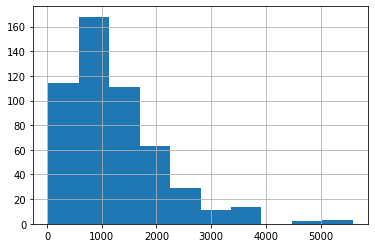

In [99]:
control.hist()

In [101]:
print(ss.shapiro(control))

ShapiroResult(statistic=0.8934255838394165, pvalue=1.9825922824313846e-18)


In [102]:
print(ss.normaltest(control))

NormaltestResult(statistic=152.1281716621267, pvalue=9.242453038103925e-34)


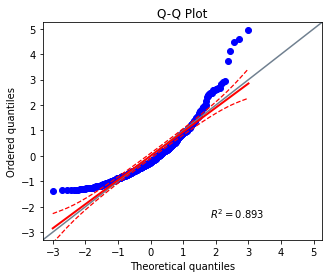

In [121]:
pg.qqplot(control)

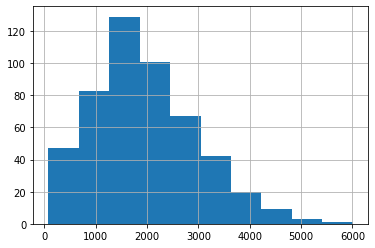

In [113]:
test.hist()

In [114]:
print(ss.shapiro(test))

ShapiroResult(statistic=0.9725738167762756, pvalue=4.3736186228215956e-08)


In [115]:
print(ss.normaltest(test))

NormaltestResult(statistic=32.12661196656157, pvalue=1.0563184134031046e-07)


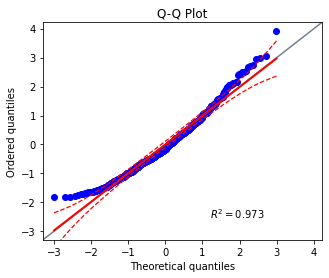

In [120]:
pg.qqplot(test)

### Попробуем логарифмировать, чтобы распределение стало нормальным

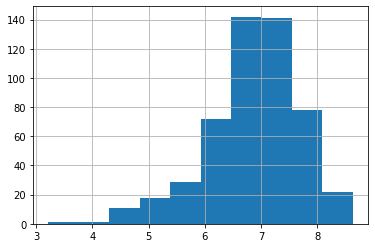

In [107]:
log_control = np.log(control)
log_control.hist()

In [108]:
print(ss.shapiro(log_control))

ShapiroResult(statistic=0.959059476852417, pvalue=9.034282349995593e-11)


In [109]:
print(ss.normaltest(log_control))

NormaltestResult(statistic=67.9102154496134, pvalue=1.7926028505282085e-15)


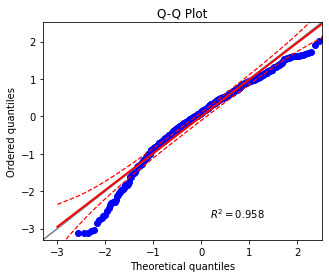

In [110]:
pg.qqplot(log_control)

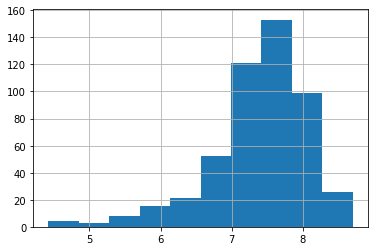

In [116]:
log_test = np.log(test)
log_test.hist()

In [117]:
print(ss.shapiro(log_test))

ShapiroResult(statistic=0.9170661568641663, pvalue=5.669035344273382e-16)


In [118]:
print(ss.normaltest(log_test))

NormaltestResult(statistic=127.18792335326143, pvalue=2.407095724446128e-28)


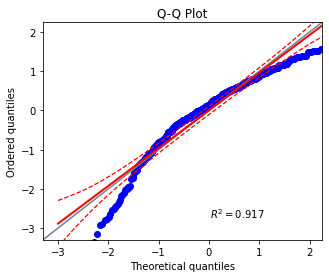

In [119]:
pg.qqplot(log_test)

### Распределения ненормальные, но так как наблюдений больше 30 в каждой группе можно использовать Student T-test

In [132]:
ss.ttest_ind(log_control, log_test)

Ttest_indResult(statistic=-11.432658961007675, pvalue=1.4745766919903342e-28)

In [134]:
ss.ttest_ind(control, test)

Ttest_indResult(statistic=-11.685795034334939, pvalue=1.0901045699351118e-29)

### В обоих случаях (при логарифмированных значениях и нет) значение pvalue ниже 0.05, что свидетельствуют о том, что различия в группах статистически значимы, следовательно стоит включать новую систему рекомендаций на всех пользователей